#Project Proposal for COVID19 prediction

#Introduction

Nowadays, humans face various diseases due to the current environmental condition and their living habits. The identification and prediction of such diseases at their earlier stages are much important, so as to prevent the extremity of it.

In this era of automation, artificial intelligence and data science have important role in the health care industry. These technologies are so well-connected that medical professionals can easily manage their roles and patient care. All health care organizations work hard to develop an automated system that can be used to accept the challenges faced in health care.

A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources.

#Objective
The objective of the chapter is to find the best-performing ML model for predicting and forecasting COVID-19.

#Dataset Description
A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources.

The following list describes each of the dataset’s features used by the model:


A. Basic information:

1. ID (Individual ID)

2. Sex (male/female).

3. Age ≥60 above years (true/false)

4. Test date (date when tested for COVID)


B. Symptoms:

5. Cough (true/false).

6. Fever (true/false).

7. Sore throat (true/false).

8. Shortness of breath (true/false).

9. Headache (true/false).


C. Other information:

10. Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

11. Corona positive or negative



##1.Importing libraries

In [ ]:

import pandas as pd
import numpy as np
import requests
import io
import seaborn as sns
import statsmodels.api as sm
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import plotly.express as px

##2. Loading the data

In [ ]:
# To read the dataset file
df=pd.read_csv("/content/corona_tested_006.csv")
df


<ipython-input-2-b70db91810ac>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/corona_tested_006.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df_date=df.loc[:,"Test_date"]
df_date

0         11-03-2020
1         11-03-2020
2         11-03-2020
3         11-03-2020
4         11-03-2020
             ...    
278843    30-04-2020
278844    30-04-2020
278845    30-04-2020
278846    30-04-2020
278847    30-04-2020
Name: Test_date, Length: 278848, dtype: object

#3. To perform Basic exploration of the data

In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [ ]:
df.shape

(278848, 11)

In [ ]:
df=df.drop(['Test_date'], axis=1)


In [ ]:
df.isnull().sum()

Ind_ID                 0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

#4.To find unique values and replacing unnatural values with Nan.


In [ ]:
df['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [ ]:
df['Cough_symptoms'] = df['Cough_symptoms'].replace({'TRUE': True, 'FALSE': False, 'None': None}).astype('boolean')

In [ ]:
df['Cough_symptoms'].unique()

<BooleanArray>
[True, False, <NA>]
Length: 3, dtype: boolean

In [ ]:
df['Fever'].unique()


array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
df['Fever'] = df['Fever'].replace({'TRUE': True, 'FALSE': False, 'None': None}).astype('boolean')

In [ ]:
df['Sore_throat'].unique()


array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [ ]:
df['Sore_throat'] = df['Sore_throat'].replace({'TRUE': True, 'FALSE': False, 'None': None}).astype('boolean')

In [ ]:
df['Shortness_of_breath'].unique()


array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
# Replacing . with NaN
df['Shortness_of_breath'] = df['Shortness_of_breath'].replace({'TRUE': True, 'FALSE': False, 'None': None}).astype('boolean')

In [ ]:
df['Headache'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
# Replacing . with NaN
df['Headache'] = df['Headache'].replace({'TRUE': True, 'FALSE': False, 'None': None}).astype('boolean')

In [ ]:
df['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [ ]:
# Replacing . with NaN
df['Corona'] = df['Corona'].replace('other', None)
df['Corona'] = df['Corona'].replace('negative', False)
df['Corona'] = df['Corona'].replace('positive', True)

In [ ]:
df['Age_60_above'].unique()


array(['None', 'No', 'Yes'], dtype=object)

In [ ]:
# Replacing . with NaN
df['Age_60_above'] = df['Age_60_above'].replace('None', None)
df['Age_60_above'] = df['Age_60_above'].replace('No', False)
df['Age_60_above'] = df['Age_60_above'].replace('Yes', True)

In [ ]:
df["Age_60_above"].value_counts(dropna=False)



None     127320
False    125703
True      25825
Name: Age_60_above, dtype: int64

In [ ]:
df['Sex'].unique()


array(['None', 'male', 'female'], dtype=object)

In [ ]:
# Replacing . with NaN
df['Sex'] = df['Sex'].replace('None', None)
df['Sex'] = df['Sex'].replace('male', False)
df['Sex'] = df['Sex'].replace('female', True)
df['Sex'].tail()

278843    False
278844     True
278845    False
278846    False
278847     True
Name: Sex, dtype: object

In [ ]:
df['Known_contact'].unique()


array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [ ]:
df['Known_contact'] = df['Known_contact'].replace('Abroad', 1)
df['Known_contact'] = df['Known_contact'].replace('Contact with confirmed', 2)
df['Known_contact'] = df['Known_contact'].replace('Other', 3)

In [ ]:
columns_to_impute= ['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath','Headache','Corona','Age_60_above', 'Sex']

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer(max_iter=10)
df[columns_to_impute] = mice_imputer.fit_transform(df[columns_to_impute])

In [ ]:
imputed_values = mice_imputer.transform(df[columns_to_impute])
imputed_values = (imputed_values > 0.5).astype(bool)
df[columns_to_impute] = imputed_values
df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,True,False,True,False,False,False,False,True,1
1,2,False,True,False,False,False,True,False,False,1
2,3,False,True,False,False,False,True,False,False,1
3,4,True,False,False,False,False,False,False,False,1
4,5,True,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...
278843,278844,False,False,False,False,False,True,False,False,3
278844,278845,False,False,False,False,False,False,False,True,3
278845,278846,False,False,False,False,False,False,False,False,3
278846,278847,False,False,False,False,False,False,False,False,3


In [ ]:
df['Fever'].unique()

array([False,  True])

#5.To transform categorical variables into numerical variables

We need to transform the categorical variables into numercial so that Our ML model can run.

In [ ]:
df_encoded=pd.get_dummies(df)
df_encoded

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,True,False,True,False,False,False,False,True,1
1,2,False,True,False,False,False,True,False,False,1
2,3,False,True,False,False,False,True,False,False,1
3,4,True,False,False,False,False,False,False,False,1
4,5,True,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...
278843,278844,False,False,False,False,False,True,False,False,3
278844,278845,False,False,False,False,False,False,False,True,3
278845,278846,False,False,False,False,False,False,False,False,3
278846,278847,False,False,False,False,False,False,False,False,3


#7.Exploratory Data Analysis

###Uni-Variate Analysis

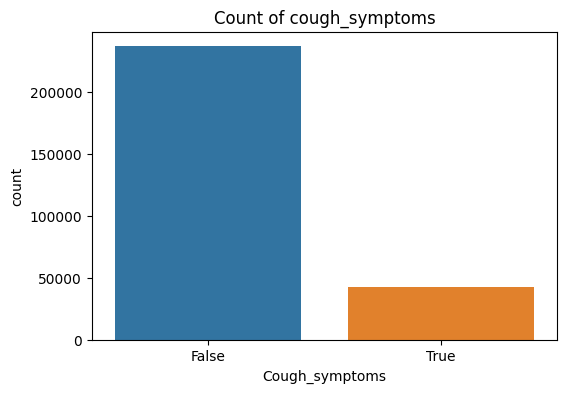

In [ ]:
import matplotlib.pyplot as pyplot
plt.figure(figsize=(6, 4))
plt.title('Count of cough_symptoms')
sns.countplot(data=df_encoded, x='Cough_symptoms')
plt.show()

In [ ]:
df_encoded['Cough_symptoms'].dtype

dtype('bool')

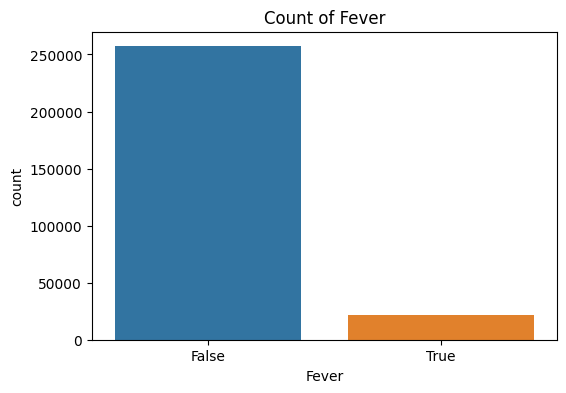

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Count of Fever')
sns.countplot(data=df_encoded, x='Fever')
plt.show()


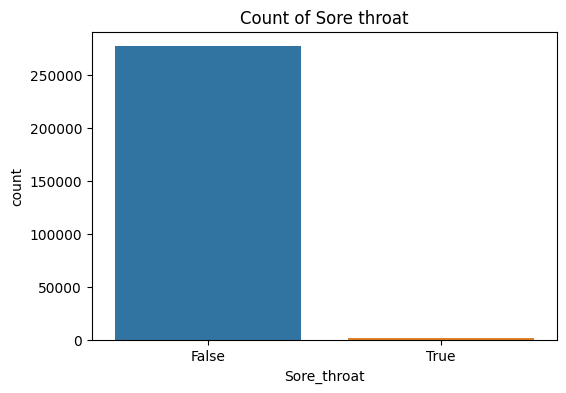

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Count of Sore throat')
sns.countplot(data=df_encoded, x='Sore_throat')
plt.show()


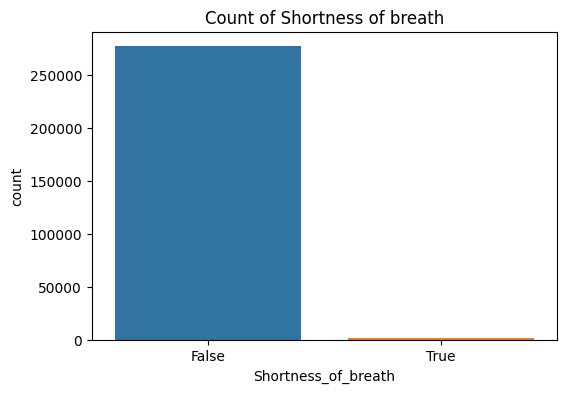

In [ ]:

plt.figure(figsize=(6, 4))
plt.title('Count of Shortness of breath')
sns.countplot(data=df_encoded, x='Shortness_of_breath')
plt.show()

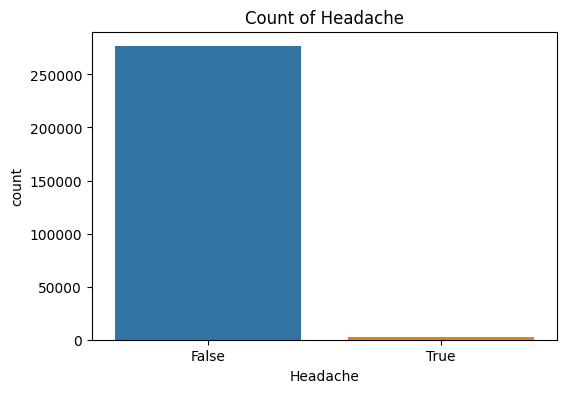

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Count of Headache')
sns.countplot(data=df_encoded, x='Headache')
plt.show()

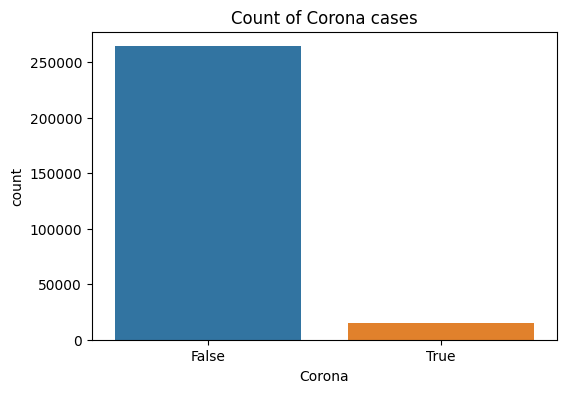

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Count of Corona cases')
sns.countplot(data=df_encoded, x='Corona')
plt.show()


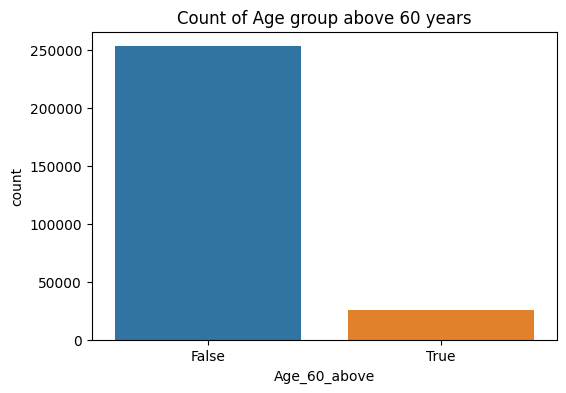

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Count of Age group above 60 years')
sns.countplot(data=df_encoded, x='Age_60_above')
plt.show()


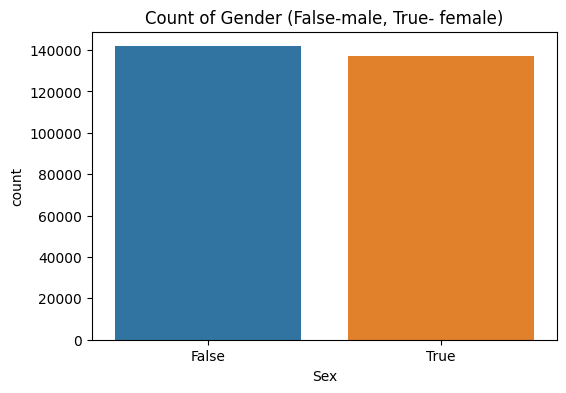

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Count of Gender (False-male, True- female)')
sns.countplot(data=df_encoded, x='Sex')
plt.show()



#

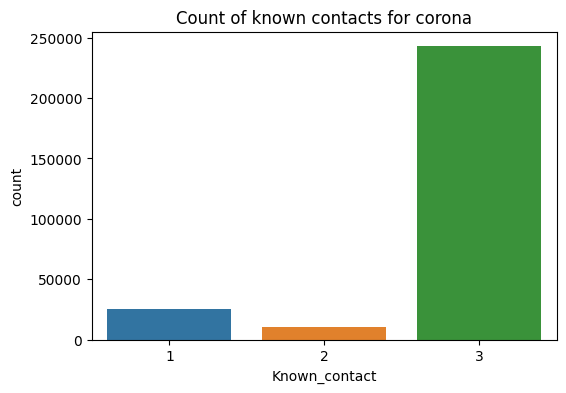

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Count of known contacts for corona')
sns.countplot(data=df, x='Known_contact')
plt.show()



#8.To see relationship between each variable with Outcome

Text(0.5, 1.0, 'Cough impact on Corona')

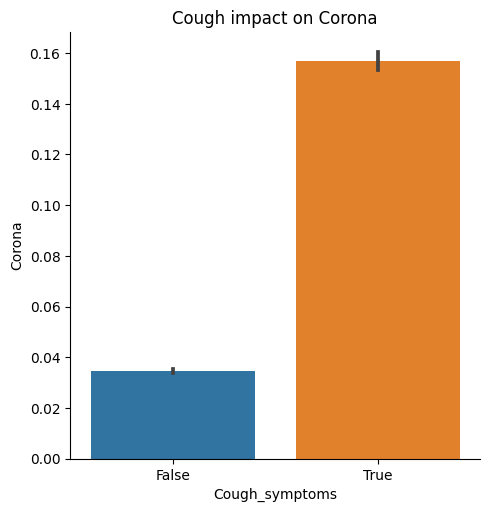

In [ ]:
sns.catplot(data=df_encoded, x="Cough_symptoms", y="Corona", kind="bar")
plt.title("Cough impact on Corona")

Here we can see patients having cough symptoms tends to positive report of covid_19 test.

Text(0.5, 1.0, 'Fever impact onCorona')

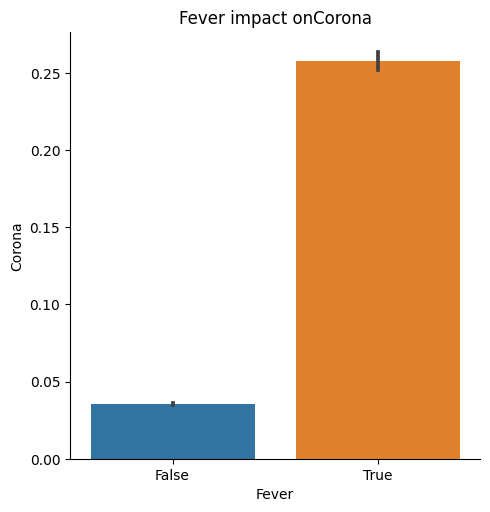

In [ ]:
sns.catplot(data=df_encoded, x="Fever", y="Corona", kind="bar")
plt.title("Fever impact onCorona")

Here we can see patients having Fever tends to positive report of covid_19 test.

Text(0.5, 1.0, 'Sore_throat impact on Corona')

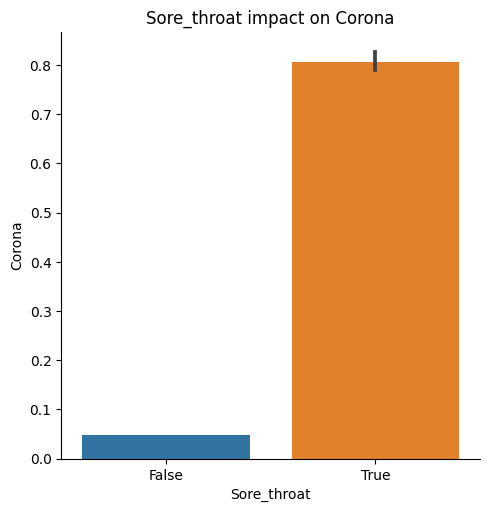

In [ ]:
sns.catplot(data=df_encoded, x="Sore_throat", y="Corona", kind="bar")
plt.title("Sore_throat impact on Corona")

Here we can see patients having Sore_throat tends to positive report of covid_19 test.

Text(0.5, 1.0, 'Shortness_of_breath impact on  Corona')

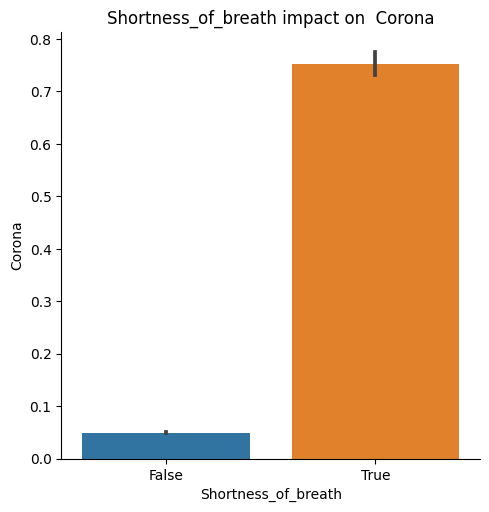

In [ ]:
sns.catplot(data=df_encoded, x="Shortness_of_breath", y="Corona", kind="bar")
plt.title("Shortness_of_breath impact on  Corona")

Here we can see patients having Shortness_of_breath tends to positive report of covid_19 test.

Text(0.5, 1.0, 'Headache impact on Corona')

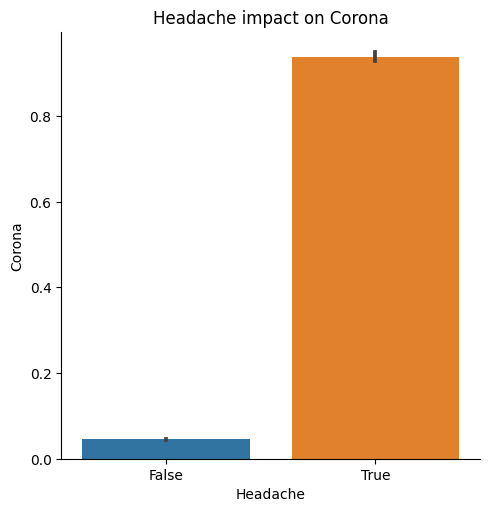

In [ ]:
sns.catplot(data=df_encoded, x="Headache", y="Corona", kind="bar")
plt.title("Headache impact on Corona")

Here we can see patients having headache tends to  positive report of covid_19 test.

Text(0.5, 1.0, 'Age_above_60 impact on Corona')

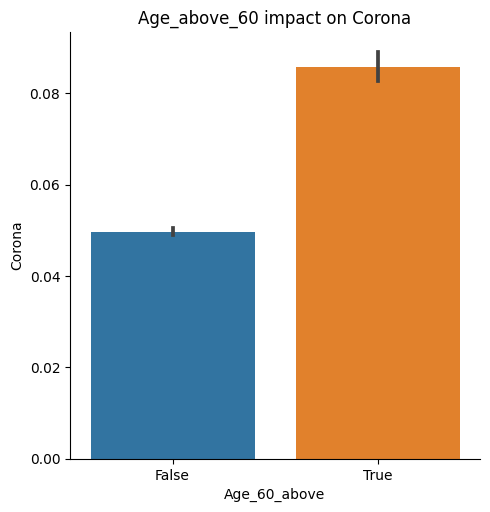

In [ ]:
sns.catplot(data=df_encoded, x="Age_60_above", y="Corona", kind="bar")
plt.title("Age_above_60 impact on Corona")

Here we can see patients above 60 age having more positive covid-19 cases vs patients who are younger.

Text(0.5, 1.0, 'Sex impact on  Corona, False-male, True- female')

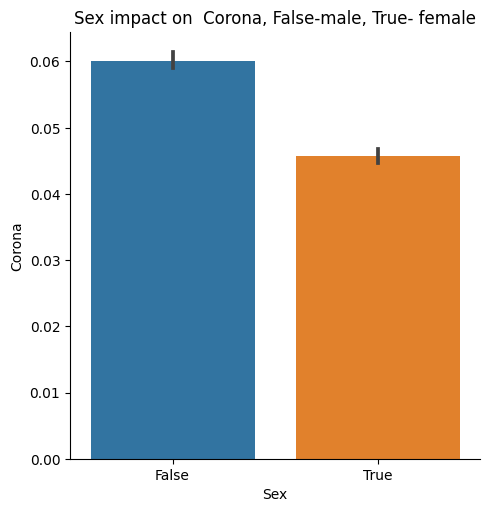

In [ ]:
sns.catplot(data=df_encoded, x="Sex", y="Corona", kind="bar")
plt.title("Sex impact on  Corona, False-male, True- female")

Here we can see thier is no dependancies on gender of positive cases of corona.

Text(0.5, 1.0, 'Known Contact impact on Corona')

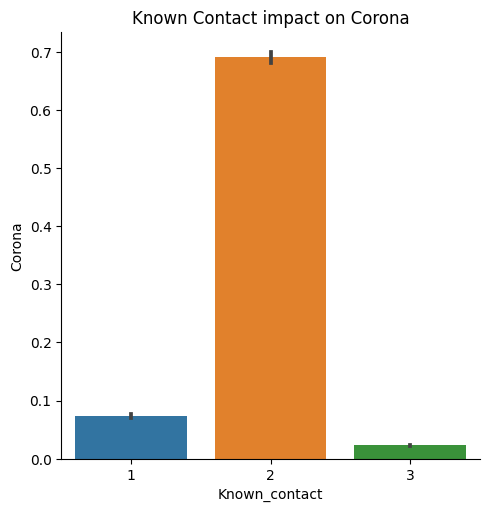

In [ ]:

sns.catplot(data=df, x="Known_contact", y="Corona", kind="bar")
plt.title("Known Contact impact on Corona")

Here we can see thier are more positive corona cases of patients belongs to category-Contact with confirmed.

#9.Correlation Matrix With Heatmap
To see the co-relation between each variable

<Axes: >

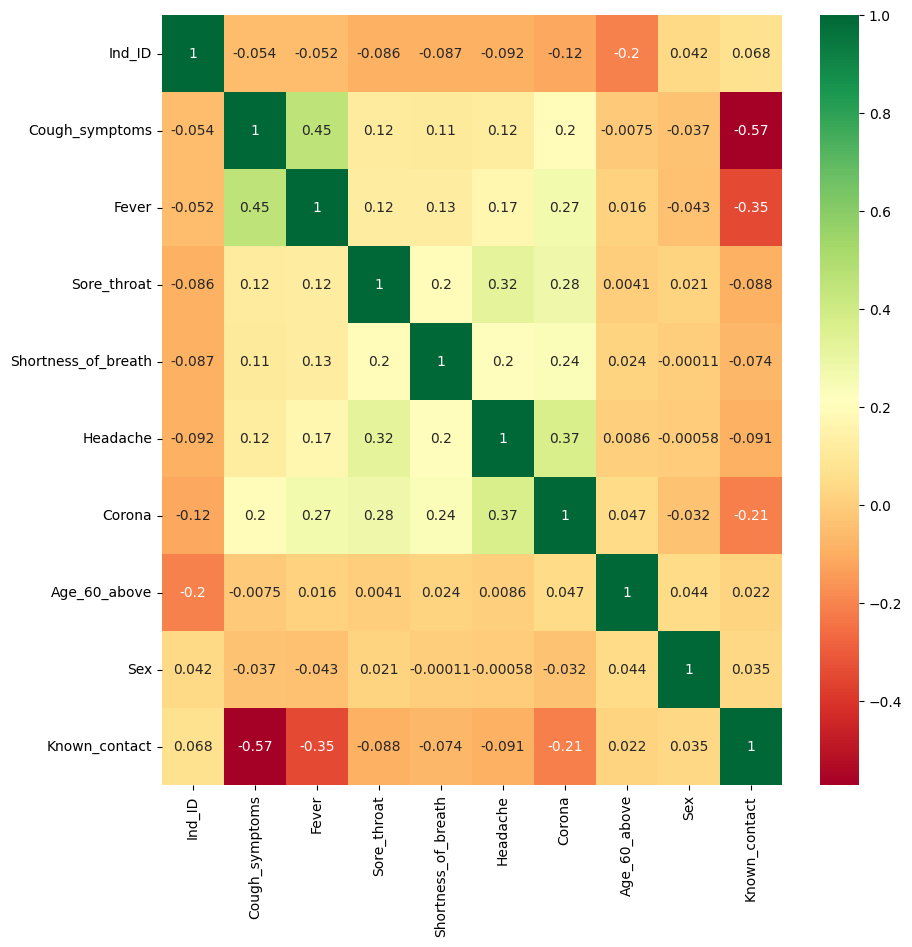

In [ ]:
import matplotlib.pyplot as pyplot

corrmat = df_encoded.corr()
top_corr_features = corrmat.index
pyplot.figure(figsize=(10,10))
# plot Heatmap
sns.heatmap(df_encoded[top_corr_features].corr(),annot=True,cmap="RdYlGn")#RedYellowGreen

Here we can see their is not strong corelation between any of the variables.

#10.Define the dependent and independent variables

In [ ]:
y = df_encoded['Corona']
X = df_encoded.drop(['Corona'],axis=1)
y

0         False
1          True
2          True
3         False
4         False
          ...  
278843     True
278844    False
278845    False
278846    False
278847    False
Name: Corona, Length: 278848, dtype: bool



#11.Splitting DATASET
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)
(len(X_train),len(X_test))
(len(y_train),len(y_test))

(223078, 55770)

#12.Creating and Training the Model

In [ ]:
X_test.tail()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
29749,29750,False,False,False,False,False,False,True,3
217355,217356,False,True,False,False,False,False,False,3
20233,20234,False,False,False,False,False,False,False,3
274687,274688,False,False,False,False,False,False,True,3
267702,267703,True,True,False,False,False,False,False,3


#13.Building different Model approach.

#Logistic Regression

In [ ]:
!pip install scipy
!pip install Scikit-learn
from sklearn.datasets import load_iris

In [ ]:
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [ ]:
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

In [ ]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)


In [ ]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

##Using Above Model to get prediction for test data

In [ ]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([False, False, False, ..., False, False, False])

##Performance Metrics

##Confusion Matrix



In [ ]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[52442,   316],
       [ 2824,   188]])

##Accuracy Score

In [ ]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.94


##Precision Score

In [ ]:

print(precision_score(y_test, logistic_reg_pred))

0.373015873015873


##Recall Score

In [ ]:
print(recall_score(y_test, logistic_reg_pred))

0.06241699867197875


In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.528213692861142

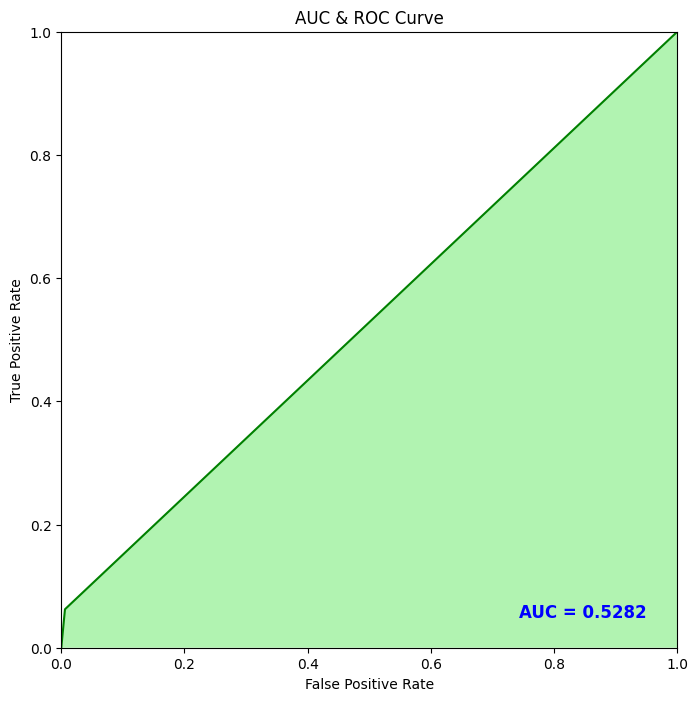

In [ ]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# **Decision Tree Algorithm**

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [ ]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
Dicision_y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.9603 


In [ ]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, Dicision_y_pred))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     52758
        True       0.63      0.63      0.63      3012

    accuracy                           0.96     55770
   macro avg       0.81      0.80      0.81     55770
weighted avg       0.96      0.96      0.96     55770



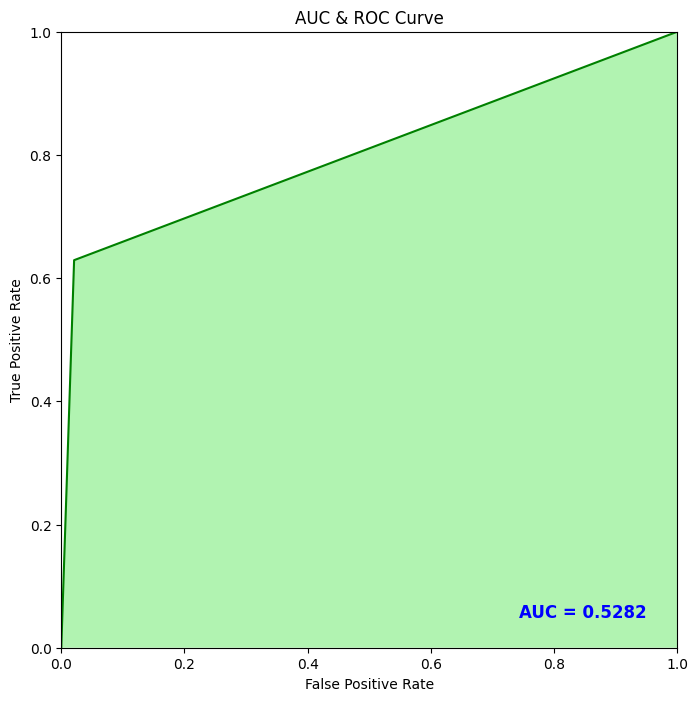

In [ ]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, Dicision_y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#  **Random forest Algorithm**

In [ ]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result
y_pred= classifier.predict(X_test)

In [ ]:
# Output
print(y_pred)

[False False False ... False False False]


In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#Output
print(cm)

[[51835   923]
 [ 1171  1841]]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [ ]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test,y_pred), 2))

0.96


In [ ]:

print(precision_score(y_test, y_pred))

0.6660636758321273


In [ ]:
print(recall_score(y_test, y_pred))

0.6112217795484728


In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.7968634012416917

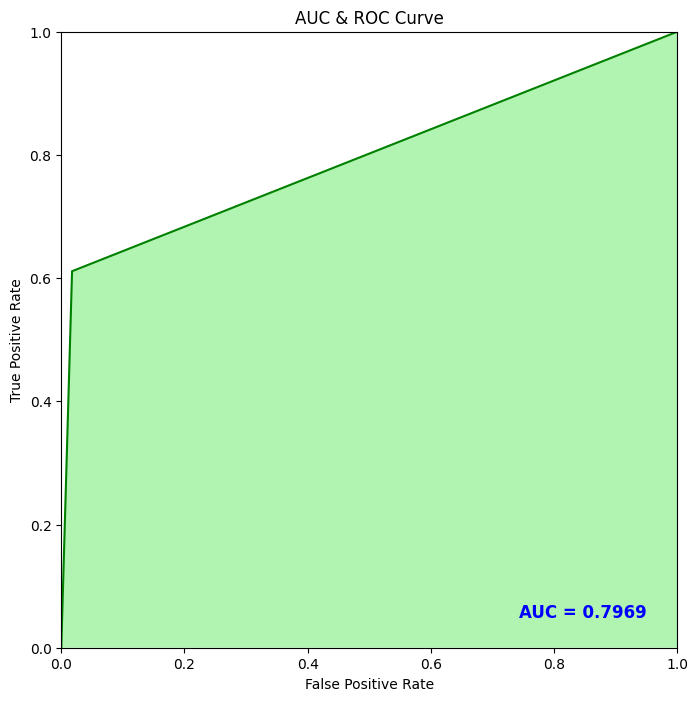

In [ ]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#Conclusion-
1. logistic regresion model and decision Tree model's ability to discriminate between positive and negative instances is not much better than random guessing.

2. random Forest Classifier is showing reasonably good discrimination power.



In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=f267131514dd3e372ceab0b2e9e7f1d9dc04341d965f808541c3c7cd627d3dc9
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
from pandasql import sqldf

In [ ]:
all_students = sqldf('SELECT * FROM df_encoded')
all_students

ObjectNotExecutableError: ignored

In [ ]:
#1.Find the number of corona patients who faced shortness of breath.
count=sqldf("select count(Shortness_of_breath) from df_mode where Shortness_of_breath=1")
count

In [ ]:
#2.Find the number of negative corona patients who have fever and sore_throat.
negative=sqldf("select count(Corona) from df_mode where Corona=0 and Fever=1 and Sore_throat=1")
negative

In [ ]:
#3.Group the data by month and rank the number of positive cases.
result = pd.concat([df_mode, df_date], axis=1)
positive=sqldf("select month(Test_date) from result")
positive

